## Run an experiment using the mobility network

In [1]:
# to allow relative imports
import os
import sys

module = os.path.abspath(os.path.join('..'))
if module not in sys.path:
    sys.path.append(module)

from configuration import GRAPHS
GRAPHS = os.path.join(module, 'data_processing', GRAPHS)

In [4]:
from model.network.mobility_network import MNGeneratorFromFile
from model.compartmental_model.seir import MonitoredSEIR
from model.compartmental_model.sir import MonitoredSIR
from experiments.runner import ExperimentRunner
from epydemic import Monitor, SEIR, StochasticDynamics, ERNetwork, SIR
from networkx import read_graphml
import numpy as np

In [32]:
params = dict()

# params[MNGeneratorFromFile.PATH] = f'{GRAPHS}post_N_10000.graphml'
# use an ER network as the substrate
# params[ERNetwork.N] = N = 10000
# params[ERNetwork.KMEAN] = k_mean = 100

T = 100

# set the parameters the same as above
params[SEIR.P_EXPOSED] = p_exposed = 0.01
params[SEIR.P_SYMPTOMS] = p_symptoms = 0.2
params[SEIR.P_REMOVE] = 0.1
params[SEIR.P_INFECT_ASYMPTOMATIC] = 0.03
params[SEIR.P_INFECT_SYMPTOMATIC] = 0.015

params[Monitor.DELTA] = T / 100

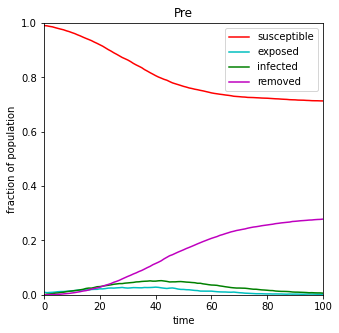

In [33]:
g = read_graphml(f'{GRAPHS}pre_N_10000_E_2_C_40.graphml')
e = StochasticDynamics(MonitoredSEIR(), g=g)
compartments = {
    SEIR.SUSCEPTIBLE: 'susceptible',
    SEIR.EXPOSED: 'exposed',
    SEIR.INFECTED: 'infected',
    SEIR.REMOVED: 'removed'
}

er = ExperimentRunner(e)
er.run(params, T=T)
er.plot('Pre', compartments)

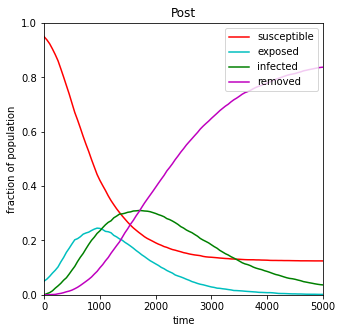

In [15]:
g = read_graphml(f'{GRAPHS}pre_N_10000_E_2_C_40.graphml')
e = StochasticDynamics(MonitoredSEIR(), g=g)
compartments = {
    SEIR.SUSCEPTIBLE: 'susceptible',
    SEIR.EXPOSED: 'exposed',
    SEIR.INFECTED: 'infected',
    SEIR.REMOVED: 'removed'
}

er = ExperimentRunner(e)
er.run(params, T=T)
er.plot('Post', compartments)

In [36]:
params = dict()

# params[MNGeneratorFromFile.PATH] = f'{GRAPHS}post_N_10000.graphml'
# use an ER network as the substrate
# params[ERNetwork.N] = N = 10000
# params[ERNetwork.KMEAN] = k_mean = 100

T = 100

# set the parameters the same as above
params[SIR.P_REMOVE] = 0.1
params[SIR.P_INFECT] = 0.03
params[SIR.P_INFECTED] = 0.01

params[Monitor.DELTA] = T / 100

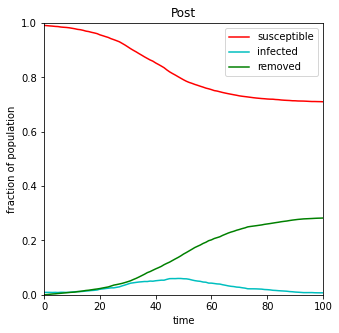

In [37]:
g = read_graphml(f'{GRAPHS}pre_N_10000_E_2_C_40.graphml')
e = StochasticDynamics(MonitoredSIR(), g=g)
compartments = {
    SIR.SUSCEPTIBLE: 'susceptible',
    SIR.INFECTED: 'infected',
    SIR.REMOVED: 'removed'
}

er = ExperimentRunner(e)
er.run(params, T=T)
er.plot('Post', compartments)